# Task 1 - Análisis
Considere que usted está diseñando el sistema de visión para un robot de almacén que debe moverse entre
estanterías para recoger productos. El robot tiene dos cámaras frontales:
1. Durante una prueba, el robot gira sobre su propio eje para escanear el entorno. El ingeniero junior a
tu cargo sugiere usar Homografías para medir la distancia a los objetos mientras el robot gira. ¿Es
este un enfoque correcto? Justifique su respuesta utilizando los conceptos de C1, C2 y Paralaje.
2. Si el robot comienza a avanzar (traslación) y detectas que la disparidad (d) de una caja aumenta
repentinamente entre el frame t y el frame t+1, ¿qué puedes inferir sobre la distancia (Z) entre el
robot y la caja? ¿Qué riesgo industrial implicaría un error en el cálculo de esta disparidad?

El robot gira sobre su propio eje y el ingeniero junior sugiere usar homografías para medir la distancia.

### Enfoque
El enfoque propuesto no es correcto. Para estimar la profundidad mediante visión, es estrictamente necesario el **paralaje**, lo cual no ocurre en este escenario por las siguientes razones:

* **Centros de Proyección ($C_1, C_2$):** Al girar sobre su propio eje, el centro óptico de la cámara no se desplaza en el espacio. Por lo tanto, el centro de la primera toma $C_1$ es coincidente con el de la segunda $C_2$.
* **Ausencia de Paralaje:** El paralaje es el cambio en la posición aparente de un objeto respecto a un fondo, causado por el movimiento del observador (traslación). Si $C_1 = C_2$, la línea de base o *baseline* es cero ($B=0$). Sin desplazamiento, no hay paralaje y no se puede triangular la distancia.
* **Naturaleza de la Homografía:** Cuando una cámara solo rota, la relación entre los píxeles de dos frames depende exclusivamente de la rotación ($\mathbf{R}$) y la matriz de parámetros intrínsecos ($\mathbf{K}$):

$$\mathbf{x}' = \mathbf{K} \mathbf{R} \mathbf{K}^{-1} \mathbf{x}$$

Una homografía de rotación pura es la correcta para crear imágenes panorámicas (*stitching*), pero es incapaz de proporcionar información de profundidad.


## 2. 

El robot avanza y la disparidad ($d$) de una caja aumenta súbitamente entre el frame $t$ y $t+1$.

### Inferencia de Distancia ($Z$)
En un sistema de visión estéreo, la relación entre la disparidad y la profundidad es inversamente proporcional, definida por:

$$Z = \frac{f \cdot B}{d}$$

Donde $f$ es la distancia focal y $B$ es la base (distancia entre cámaras). Por lo tanto:
* Si la **disparidad ($d$) aumenta**, la **distancia ($Z$) disminuye**. 
* Un aumento repentino indica que el robot se está acercando peligrosamente rápido al objeto.



### Riesgo Industrial
Un error en este cálculo puede hacer que el sistema de frenado autónomo podría no activarse si el cálculo de $Z$ es erróneo, resultando en daños estructurales o pérdida de carga.También un salto brusco en la percepción de cercanía puede provocar maniobras de evasión violentas, comprometiendo la estabilidad mecánica del robot.O un riesgo de atropello en entornos de almacén compartidos con humanos.

# Task 2 - Ingeniería de Dimensiones

Como director de proyectos, debe asegurar que los modelos de IA quepan en la memoria de los dispositivos
(Edge Computing). Por ello, tiene una imagen de entrada de alta resolución proveniente de una cámara
industrial de 1280 x 720 píxeles. Se aplica una capa convolucional con los siguientes hiperparámetros
• Tamaño del Filtro (F): 5×5
• Padding (P): 2
• Stride (S): 2
Considerando esto, respodan:
1. Utilizando la fórmula vista en clase, calcule las dimensiones (Wout,Hout) del Mapa de Características
resultante. Muestra el procedimiento.


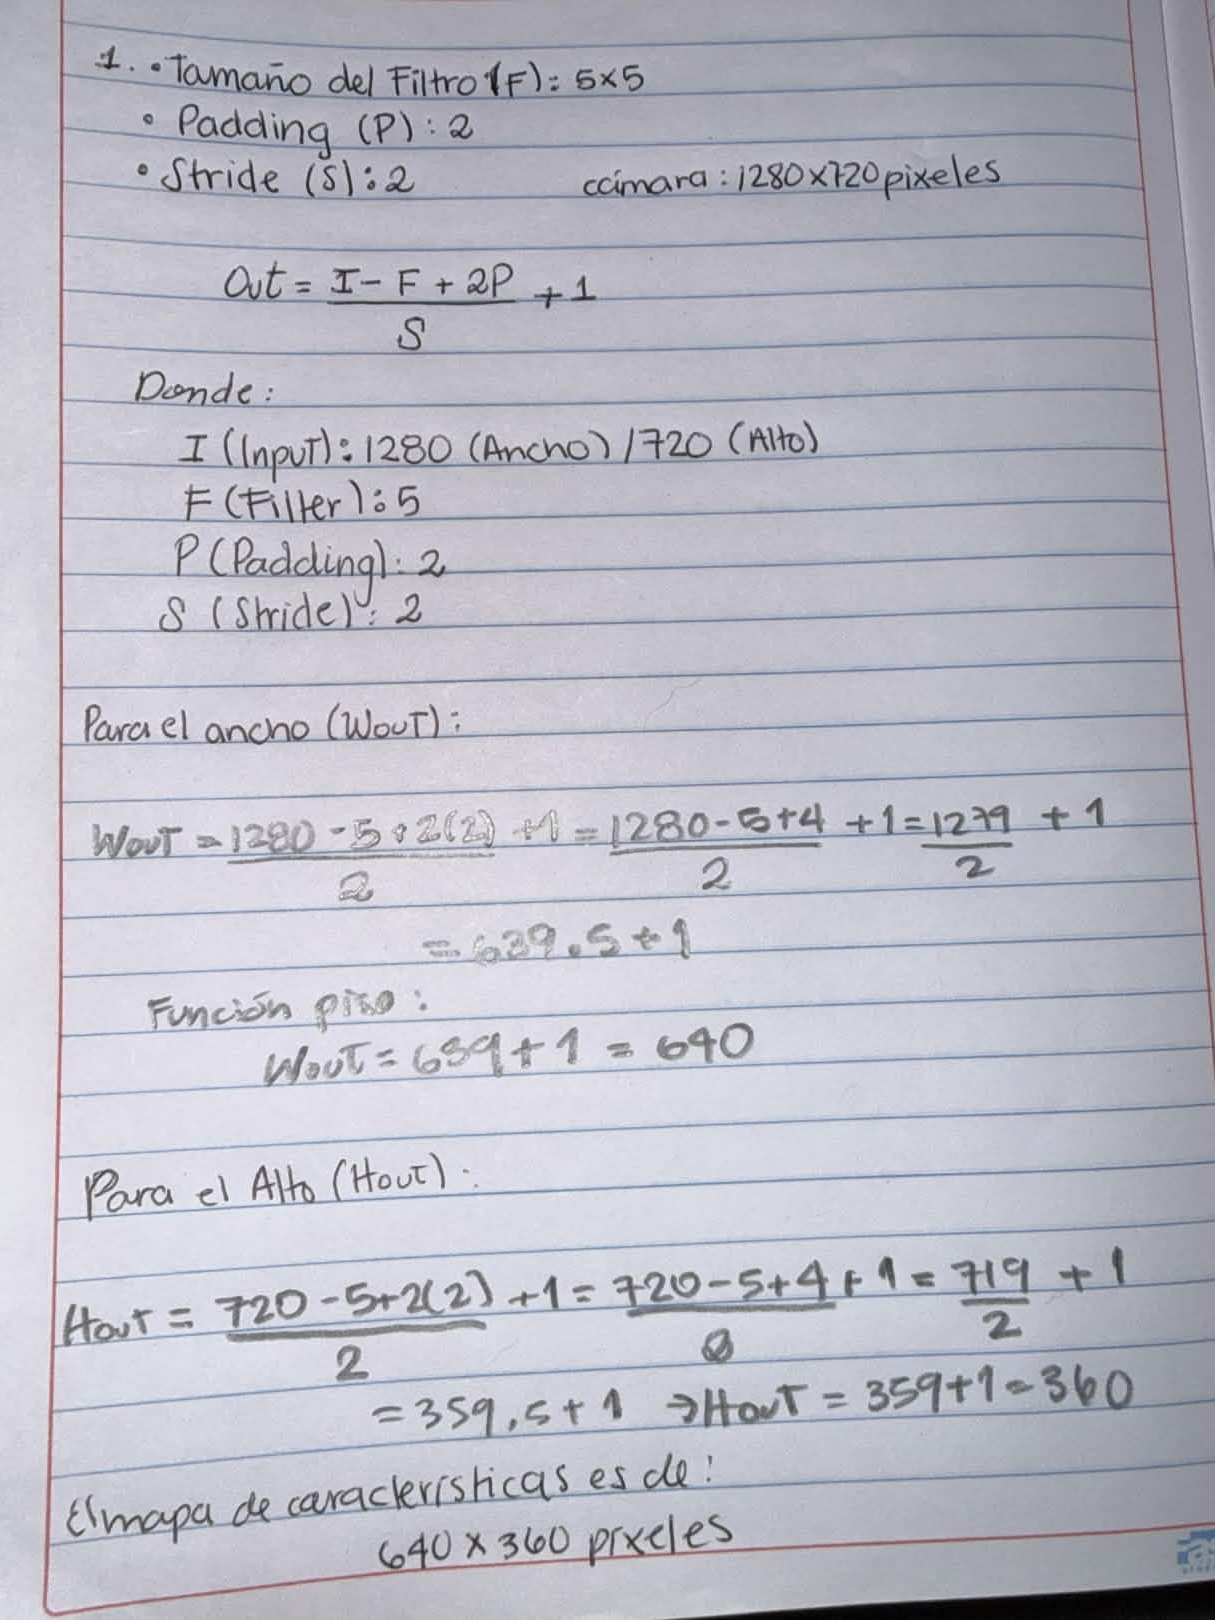

In [2]:
from IPython.display import Image
Image(filename='foto.jpg', width=800)

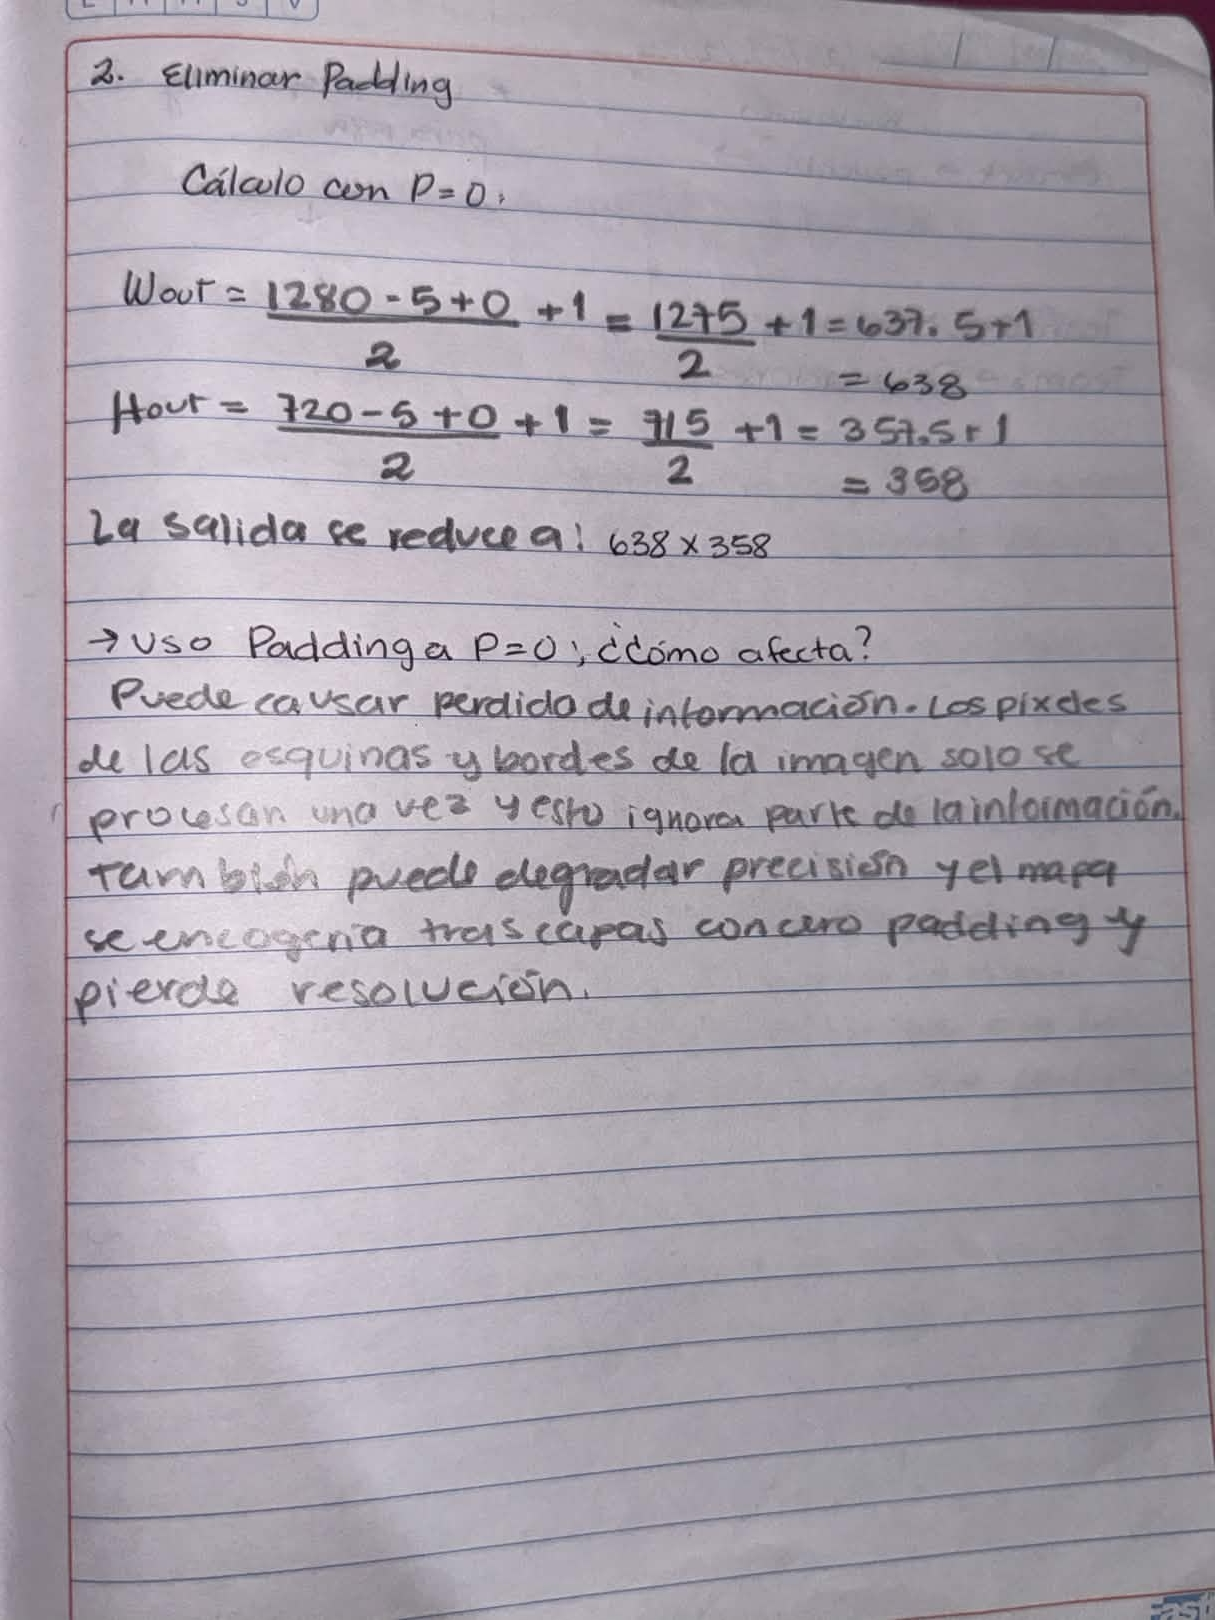

In [3]:
Image(filename='foto2.jpg', width=800)

¿Qué sucedería con el tamaño de la salida si decides cambiar el Padding a P=0 (Valid Padding)?
¿Cómo afectaría esto a la información de los bordes de la imagen (donde suelen estar las referencias
de las paredes del almacén)?

R/ Si eliminamos el padding el tamaño del mapa de características se reduciría significativamente porque al no haber un "colchón" de píxeles extra alrededor de la imagen, el filtro tiene menos espacio para desplazarse y lo afectaria creando una pérdida de datos en los extremos donde Al usar P=0 los píxeles de los bordes solo se tocan una vez por el filtro y los pixeles centrales se procesan muchas veces lo que causa que la red ignore informacion valiosa que está pegada a los limites de la imagen.

Tambien pasaria un punto ciego en las paredes porque si las referencias de las paredes del almacén estan en los bordes el robot podria perderlas de vista y al no tener padding la estructura de la red neuronal tiende a encoger la representacion visual borrando detalles perifericos que podrian ser esenciales para que el robot no choque con los objetos. 



# Task 3 - Criterio de Diseño

En la industria, el balance entre precisión y velocidad es clave. Analice los siguientes escenarios:

1. Usted está desarrollando un sistema de detección de grietas microscópicas en motores de avión.
¿Qué combinación de Stride y Pooling recomendaría para no perder detalles críticos en las
primeras capas de la red? Justifique técnicamente.


Para el sistema de detección de grietas microscopicas en motores de avion la recomendación tecnica es utilizar un Stride de 1 y evitar el uso de Pooling en las primeras capas de la red ya que el objetivo principal en este escenario es la precisión extrema, ya que las grietas pueden ser de apenas unos pocos píxeles de ancho y cualquier perdida de datos representaria un riesgo de seguridad. Al usar un Stride de 1 el filtro se desplaza pixel por pixel sin saltarse ninguna parte de la imagen lo que asegura que se analice toda la superficie del motor en busca de las grietas y si se usara un Stride mayor el sistema podria saltar sobre una grieta pequeña ignorandola, por otro lado el Pooling está diseñado para resumir la informacion y reducir el tamaño de los datos pero en el proceso descarta muchos detalles donde en las etapas iniciales de la red donde se detectan bordes y texturas sutiles el Pooling eliminaria la nitidez necesaria para identificar una falla microscopica.

2. Un cliente le pide que el sistema funcione en un procesador muy limitado (como una cámara
inteligente con poca RAM). Explique cómo podrías utilizar el Stride y el Max Pooling
estratégicamente para reducir la carga computacional sin eliminar las características más fuertes
(activaciones) del Mapa de Características

Se puede usar un Stride mayor a uno desde las primeras capas para que esto haga que el filtro de la camara se pase pixeles de forma controlada reduciendo el tamaño del mapa de caracteristicas y por lo tanto la cantidad de calculos en cpu y memoria necesarios para procesar la siguiente capa

Tambien el Max Pooling es la herramienta ideal para este caso ya que reduce a la mitad el ancho y el alto de la imagen conservando unicamente el valor mas alto de cada sector esto permite que la red neuronal siga detectando los rasgos mas importantes como los bordes de un objeto o una señal brillante pero trabajando con una fraccion de los datos originales y al combinar ambas tecnicas se logra que el procesador de la camara inteligente no se sature.